In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=1)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

In [3]:
df = pd.read_csv("healthcare_dataset.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [4]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [22]:
features_to_encode = []

for col in df.columns:
  col_values = df[col].nunique()
  print("---------------------")
  print(f"Col is: {col}")
  print(f"Amount of column values: {col_values}")
  
  if col_values >2 and col_values <=10:
    features_to_encode.append(col)

---------------------
Col is: Name
Amount of column values: 9378
---------------------
Col is: Age
Amount of column values: 68
---------------------
Col is: Gender
Amount of column values: 2
---------------------
Col is: Blood Type
Amount of column values: 8
---------------------
Col is: Medical Condition
Amount of column values: 6
---------------------
Col is: Date of Admission
Amount of column values: 1815
---------------------
Col is: Doctor
Amount of column values: 9416
---------------------
Col is: Hospital
Amount of column values: 8639
---------------------
Col is: Insurance Provider
Amount of column values: 5
---------------------
Col is: Billing Amount
Amount of column values: 10000
---------------------
Col is: Room Number
Amount of column values: 400
---------------------
Col is: Admission Type
Amount of column values: 3
---------------------
Col is: Discharge Date
Amount of column values: 1834
---------------------
Col is: Medication
Amount of column values: 5
--------------

In [9]:
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"])

In [15]:
df["Number_of_days"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

In [17]:
df["amount_spent_per_day"] = df["Billing Amount"] / df["Number_of_days"]

In [21]:
df[df["Number_of_days"] == 1]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Number_of_days,amount_spent_per_day
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1,23303.322092
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal,1,22788.236026
37,Mariah Williams,72,Male,A-,Diabetes,2021-03-19,John Harvey,Anderson-Mason,Blue Cross,24913.552652,219,Elective,2021-03-20,Penicillin,Normal,1,24913.552652
87,Jesse Williams,73,Male,B-,Arthritis,2019-10-21,Eric Sellers,Burke-Reed,Cigna,17241.116363,347,Urgent,2019-10-22,Lipitor,Abnormal,1,17241.116363
113,Tammy Thompson,19,Male,AB+,Cancer,2021-05-31,Rodney Obrien,Davies-Holloway,Medicare,25436.994720,211,Urgent,2021-06-01,Lipitor,Inconclusive,1,25436.994720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844,David Garcia,60,Female,B+,Hypertension,2019-08-18,Eugene Johnson,"Norris, Ellis and Waters",UnitedHealthcare,48559.376379,160,Emergency,2019-08-19,Paracetamol,Inconclusive,1,48559.376379
9858,Ashley Gray,68,Female,AB+,Arthritis,2023-03-24,Austin Kim,Chavez Group,Cigna,42645.151121,252,Urgent,2023-03-25,Penicillin,Abnormal,1,42645.151121
9878,John Miller,50,Male,B-,Arthritis,2023-05-23,James Mccormick,"Clark, Warren and Beltran",UnitedHealthcare,6711.307078,236,Elective,2023-05-24,Lipitor,Normal,1,6711.307078
9904,Anthony Warner,57,Female,B-,Arthritis,2022-09-14,Tammy Washington,"Cabrera, Chavez and Juarez",Aetna,29362.847315,448,Elective,2022-09-15,Lipitor,Abnormal,1,29362.847315


In [26]:
df.drop(["Doctor","Room Number","Name", "Date of Admission", "Discharge Date"], inplace=True, axis=1)

In [27]:
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py

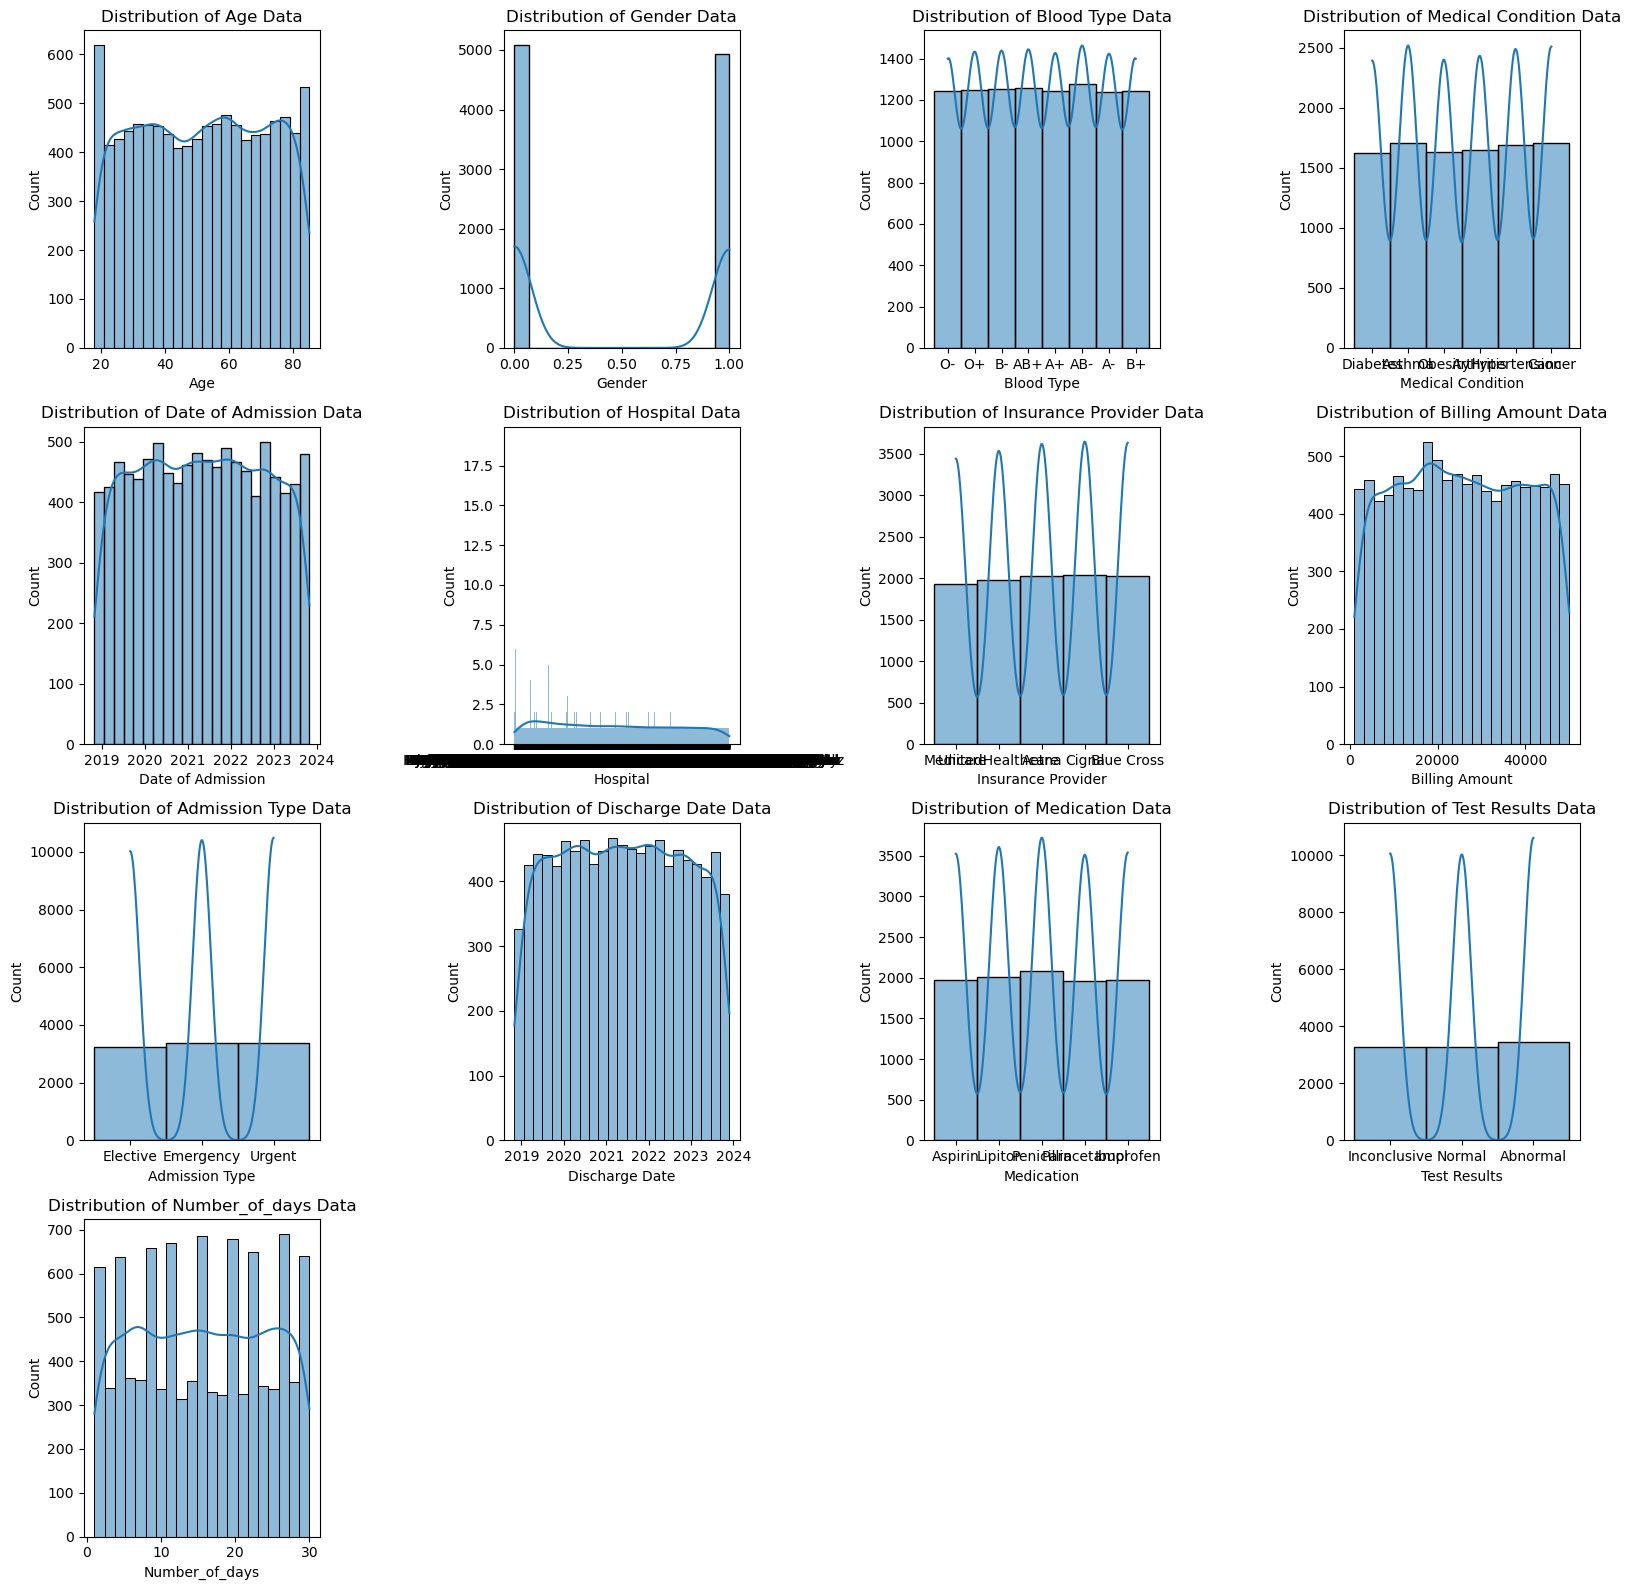

In [28]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

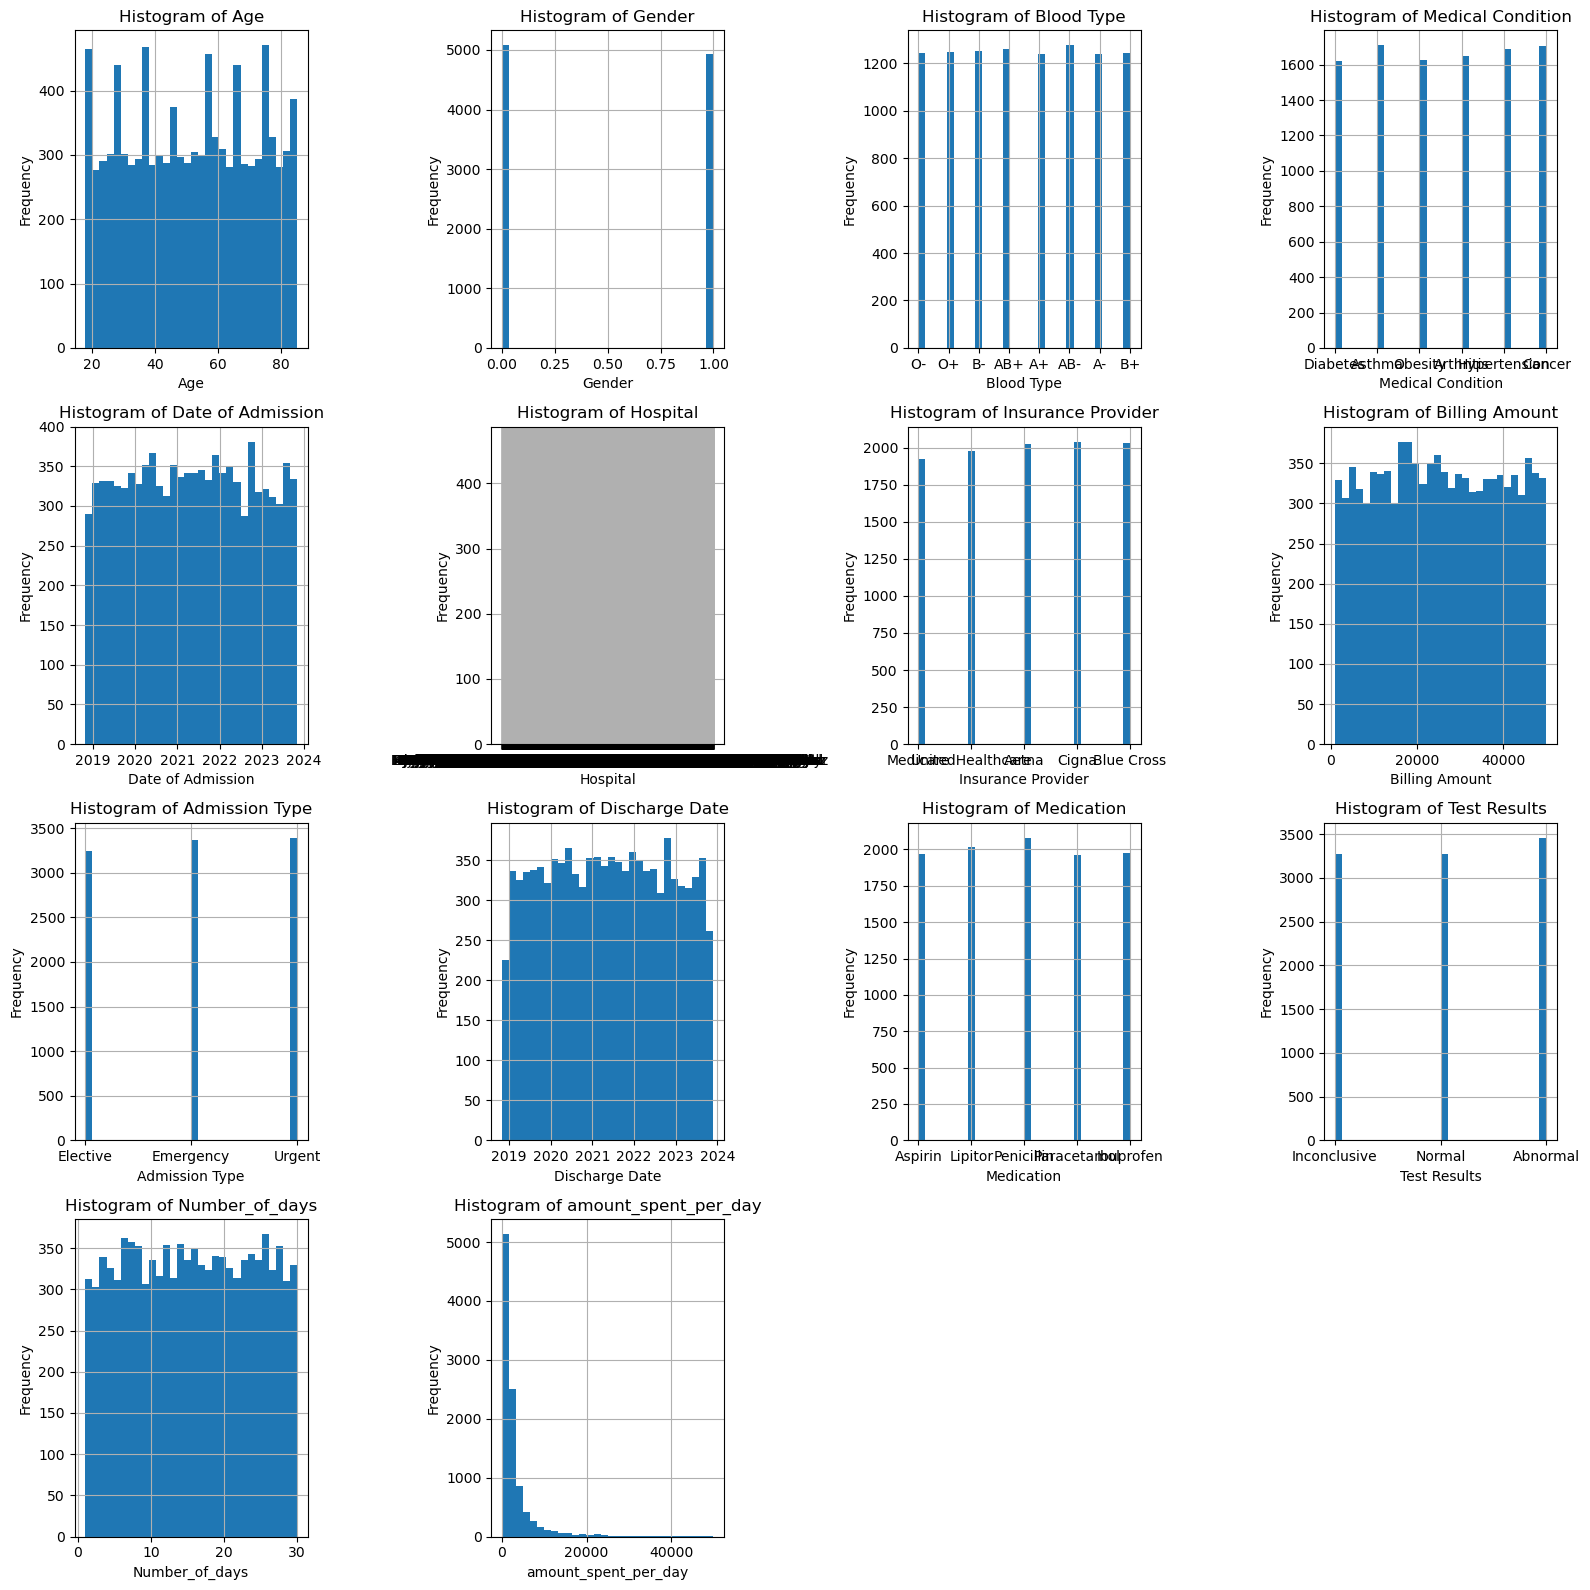

In [29]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns)  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up


for i, column in enumerate(df.columns):
    plt.subplot(rows, 4, i+1)
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.plot()